### Feed-forward сети

In [1]:
# Сделаем необходимые импорты
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/
torch.Size([3, 32, 32])
19


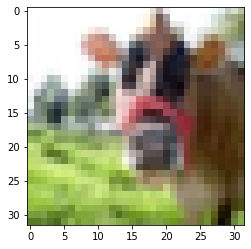

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64,
                                         shuffle=False)

Files already downloaded and verified


In [5]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

import torch.nn as nn
import torch.nn.functional as F

class LeakyRelu(nn.Module):
    def __init__(self, border:float, alpha:float):
        super().__init__()
        self.border = border
        self.alpha = alpha
        
    def forward(self, input):
        x = F.leaky_relu(input)
        return torch.where(x>self.border, x*self.alpha, x)

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.leaky_relu = LeakyRelu(0.1, 0.5)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)        
        x = self.leaky_relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.leaky_relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x

      
    
net = Net(3072, 100, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [6]:
# Запустить обучение (по аналогии с тем, что делали на паре)
from tqdm import tqdm

#for epoch in tqdm.notebook.tqdm(range(10)):  
for epoch in tqdm(range(10)):  
    running_loss = 0.0 
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.645
[1,   601] loss: 0.593


 10%|████████▎                                                                          | 1/10 [00:23<03:32, 23.66s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.558
[2,   601] loss: 0.548


 20%|████████████████▌                                                                  | 2/10 [00:47<03:10, 23.77s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.532
[3,   601] loss: 0.524


 30%|████████████████████████▉                                                          | 3/10 [01:12<02:49, 24.23s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.512
[4,   601] loss: 0.511


 40%|█████████████████████████████████▏                                                 | 4/10 [01:37<02:26, 24.43s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.501
[5,   601] loss: 0.496


 50%|█████████████████████████████████████████▌                                         | 5/10 [02:01<02:02, 24.55s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.490
[6,   601] loss: 0.487


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [02:26<01:38, 24.53s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.481
[7,   601] loss: 0.475


 70%|██████████████████████████████████████████████████████████                         | 7/10 [02:51<01:14, 24.81s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.472
[8,   601] loss: 0.470


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [03:18<00:51, 25.54s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.465
[9,   601] loss: 0.466


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [03:46<00:26, 26.17s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.456
[10,   601] loss: 0.459


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:14<00:00, 25.43s/it]

Training is finished!
